In [14]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Shree\AppData\Local\Temp\pip-install-5e2k4r97\sklearn_cf26ad244ae144c7a95e87e59be4389b\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\Shree\AppData\Local\Programs\Python\Python39\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned ab

In [15]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

keypoints using MEDIAPIPE HOLISTICS

In [16]:
mpHolistics = mp.solutions.holistic # mediapipe holistics model
mpDrawing = mp.solutions.drawing_utils # Drawing utilities

In [17]:
def mediapipeDetection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # as openCV take BGR therefore we convert it to RGB
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # we reverse it back from RGB to BGR
    return image, results

In [18]:
def drawLandmark(image, results):
    mpDrawing.draw_landmarks(image, results.face_landmarks, mpHolistics.FACEMESH_CONTOURS) # Draw face connections 
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistics.POSE_CONNECTIONS) # Draw pose connections 
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistics.HAND_CONNECTIONS) # Draw left hand connections 
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistics.HAND_CONNECTIONS) # Draw right hand connections 

In [20]:
def drawStyleLandmark(image, results):
    mpDrawing.draw_landmarks(image, results.face_landmarks, mpHolistics.FACEMESH_CONTOURS,
                            mpDrawing.DrawingSpec(color = (80,110,10), thickness=1, circle_radius=1),
                            mpDrawing.DrawingSpec(color = (80,110,10), thickness=1, circle_radius=1)
                            ) # Draw face connections 
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistics.POSE_CONNECTIONS,
                            mpDrawing.DrawingSpec(color = (80,22,10), thickness=2, circle_radius=4),
                            mpDrawing.DrawingSpec(color = (80,44,121), thickness=2, circle_radius=2)
                            ) # Draw pose connections 
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistics.HAND_CONNECTIONS,
                            mpDrawing.DrawingSpec(color = (121,22,76), thickness=2, circle_radius=4),
                            mpDrawing.DrawingSpec(color = (121,44,250), thickness=2, circle_radius=2)
                            ) # Draw left hand connections 
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistics.HAND_CONNECTIONS,
                            mpDrawing.DrawingSpec(color = (121,22,76), thickness=2, circle_radius=4),
                            mpDrawing.DrawingSpec(color = (121,44,250), thickness=2, circle_radius=2)
                            ) # Draw right hand connections 

In [21]:
camera = cv2.VideoCapture(0)
with mpHolistics.Holistic(min_detection_confidence = 0.5, min_tracking_confidence=0.5,) as holistics:
    while camera.isOpened():
        ret, frame = camera.read() # reads the frame
        
        #make mediapipe holistic detection
        image, results = mediapipeDetection(frame, holistics)
#         print(results)
        
        #print landmark on live feed
        drawStyleLandmark(image, results)
        
        cv2.imshow('OpenCV Feed', image) # output the frames

        # Break the loop or camera
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    camera.release()
    cv2.destroyAllWindows()

In [ ]:
# len(results.left_hand_landmarks.landmark)

In [22]:
# frame
results

mediapipe.python.solution_base.SolutionOutputs

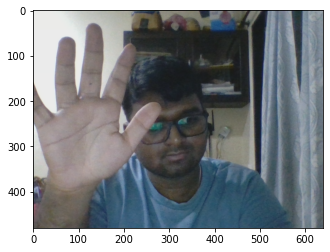

In [23]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


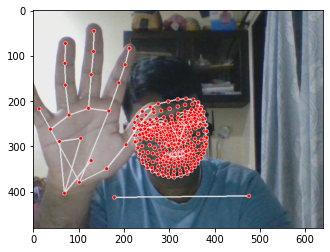

In [24]:
drawLandmark(frame, results)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Extract Keypoint Values

In [25]:
len(results.pose_landmarks.landmark)

33

In [26]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [27]:
len(pose)

33

In [28]:
def extractKeypointsArray(results):
    # extracting keypoints from face, pose, lefthand and righthand and storing them in form of numpy arrays
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    leftHand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rightHand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, leftHand, rightHand])

In [29]:
# face.shape

NameError: name 'face' is not defined

In [30]:
# pose.shape

AttributeError: 'list' object has no attribute 'shape'

In [31]:
# leftHand.shape

NameError: name 'leftHand' is not defined

In [32]:
# rightHand.shape

NameError: name 'rightHand' is not defined

In [33]:
# extractKeypointsArray(results).shape

(1662,)

In [34]:
# 1404+132+63+63

1662

Setteing up Folder for data collection

In [35]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('signLanguageDataset') 

# Actions that we try to detect
actions = np.array(['A'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [36]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collecting Keypoint values for training and testing

In [38]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mpHolistics.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipeDetection(frame, holistic)
#                 print(results)

                # Draw landmarks
                drawStyleLandmark(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extractKeypointsArray(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()